In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.colors as colors
#from partials import zintegral_fast, restrate_Ia, sigOM0sqinv
from matplotlib import ticker, cm
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
#sys.path.insert(1, '/Users/akim/project/PeculiarVelocity/doc/src/')

import partials_fD2 

In [2]:
cov,z,fD = partials_fD2.set1(useGW=True)

[[[ 1.10276284e-03  3.82056678e-06  1.75181338e-05 -2.05838900e-05]
  [ 3.82056678e-06  1.04190957e-03  1.44016225e-04 -1.69219746e-04]
  [ 1.75181338e-05  1.44016225e-04  3.17046047e-03 -7.75909522e-04]
  [-2.05838900e-05 -1.69219746e-04 -7.75909522e-04  9.11697357e-04]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [3]:
err=[]
for  i in range(3): err.append(np.sqrt(cov[0][i,i]))

In [4]:
#w galaxy survey 
cov_gwg,z_gwg,fD_gwg = partials_fD2.set1(useGW=True,gsurvey=True)
err_gwg=[]
for  i in range(3): err_gwg.append(np.sqrt(cov_gwg[0][i,i]))

In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey
In Gsurvey

In [5]:
fD_var_SN = partials_fD2.set1(useGW=False)

[[[ 6.50088643e-04 -3.07614134e-06 -1.09421402e-05  1.29012971e-05]
  [-3.07614134e-06  4.04443961e-04  1.66567754e-05 -1.96391204e-05]
  [-1.09421402e-05  1.66567754e-05  4.29914488e-04 -6.98583015e-05]
  [ 1.29012971e-05 -1.96391204e-05 -6.98583015e-05  8.23662177e-05]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [6]:
covSN,z,fD = fD_var_SN
errSN=[]
for  i in range(3): errSN.append(np.sqrt(covSN[0][i,i]))

In [7]:
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':13.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})


# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)




In [8]:
#external results

#Wang 
y_w = 0.403
yerr_w = 0.031
z_w = 0.03

#WIGGLEZ

y_wi = [ 0.42,0.45, 0.43, 0.38 ]
yerr_wi = [0.07,0.04,0.04,0.04]
z_wi = [0.22, 0.41, 0.6, 0.78]

#6dFGRS
z_6 = 0.067
y_6 = 0.423
yerr_6 =  0.055

#SDSS II MGS
z_sm = 0.15
y_sm = 0.49
yerr_sm = 0.14
#0.15147311212814646, 0.5994047619047619

#SDSS II LRG

z_sl = [0.25, 0.3713]
y_sl = [0.35,0.45892857142857135]
yerr_sl = [0,0]
yerr_sl[0] = y_sl[0]-0.29404761904761895
yerr_sl[1] = y_sl[1]-0.4226190476190476

#Vipers
z_v = [0.6, 0.86] 
y_v = [0.48,0.48]
yerr_v = [0.12,0.10]


#BOSS

z_b = [0.38, 0.51, 0.61]
y_b = [0.43, 0.452, 0.457]
yerr_b = [0.054,0.057 , 0.052]

#eBoss

y_e = 0.454
yerr_e = 0.134
z_e = 0.72


In [9]:
#Theoretical prediction
#from astropy.cosmology import FlatLambdaCDM

gamma=0.55
om0=0.3

zs=np.linspace(0,0.85)

fD_th = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th.append(f*D_)
    
gamma=0.42
fD_th_42 = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th_42.append(f*D_)
    
gamma=0.68
fD_th_68 = []
for iz in zs: 
    a = 1./(1+iz)
    f = partials_fD2.OmegaM(a,OmegaM0=om0)**gamma
    D_ = partials_fD2.D(a,OmegaM0=om0,gamma=gamma)
    fD_th_68.append(f*D_)

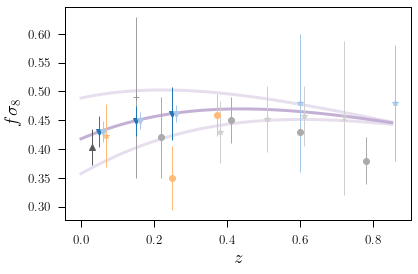

In [10]:
plt_style()

sigma8=0.81 #Planck

plt.errorbar(z,np.array(fD)*sigma8, yerr=np.array(err)*sigma8, fmt='v', label='GW BNS (This work)',c=tableau20[0],zorder=200)#,markersize=8)
#plt.errorbar(z+0.02,np.array(fD)*sigma8, yerr=np.array(errSN)*sigma8, fmt='v', label='SN (This work)',c=tableau20blind[5],zorder=200)#,markersize=8)
plt.errorbar(z+0.01,np.array(fD_gwg)*sigma8, yerr=np.array(err_gwg)*sigma8, fmt='v', label='GW BNS + galaxies (This work)',c=tableau20[1],zorder=200)#,markersize=8)




plt.plot(zs,np.array(fD_th)*sigma8, c=tableau20[9], alpha=1,lw=3,zorder=-10)
plt.plot(zs,np.array(fD_th_42)*sigma8, c=tableau20[9], alpha=0.4,lw=3,zorder=-10)
plt.plot(zs,np.array(fD_th_68)*sigma8, c=tableau20[9], alpha=0.4,lw=3,zorder=-10)

plt.errorbar(z_w,y_w, yerr=yerr_w, fmt='^', label='GW+PSCz (W17)',c=tableau20blind[3])
plt.errorbar(z_wi,y_wi, yerr=yerr_wi, fmt='o', label='WiggleZ',c=tableau20blind[2])

plt.errorbar(z_6,y_6, yerr=yerr_6, fmt='*', label='6dFGRS',c=tableau20blind[8])
plt.errorbar(z_sm,y_sm, yerr=yerr_sm, fmt='+', label='SDSS-II MGS',c=tableau20blind[6],alpha=0.8)
plt.errorbar(z_sl,y_sl, yerr=yerr_sl, fmt='o', label='SDSS-LRG',c=tableau20blind[8])
plt.errorbar(z_v,y_v, yerr=yerr_v, fmt='*', label='Vipers',c=tableau20blind[7])
plt.errorbar(z_b,y_b, yerr=yerr_b, fmt='*', label='BOSS',c=tableau20blind[9])
plt.errorbar(z_e,y_e, yerr=yerr_e, fmt='x', label='eBOSS+CMASS',c=tableau20blind[9])



#plt.ylim(0.2,0.5)
plt.ylabel(r'$f\sigma_8$')
plt.xlabel('$z$')
#plt.legend(fontsize=10,bbox_to_anchor=(1.04,1), loc="upper left") #loc="upper right")#bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('fs8_5yr_gsurvey.png',dpi=350)

In [26]:
print(z,np.array(fD)*sigma8, np.array(err)*sigma8)

[0.05 0.15 0.25] [0.43012133 0.44928776 0.46160742] [0.02689838 0.02614569 0.04560854]


In [ ]:
z=np.linspace(0.001,0.2,num=20)
d=cosmo.como


plt.plot()